In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"F:\Payam\DL\MadaLine.csv")
dataset = dataset.replace(0 , -1)
dataset

,X1,X2,Class
0,-0.642823,0.720606,-1
1,-0.218126,0.677263,-1
2,-0.582930,-0.347496,-1
3,0.285127,0.091750,-1
4,-0.335577,-0.313893,-1
...,...,...,...
195,0.744066,-1.206548,1
196,-0.457547,1.286227,1
197,-1.020000,-0.783926,1
198,1.363429,-0.800250,1


In [4]:
classA = dataset[dataset['Class'] ==-1]
classB = dataset[dataset['Class'] == 1]
classA_vals = classA[['X1' , 'X2']].values
classB_vals = classB[['X1' , 'X2']].values
classA_X1 = classA_vals[:,0] 
classA_X2 = classA_vals[:,1] 
classB_X1 = classB_vals[:,0] 
classB_X2 = classB_vals[:,1]

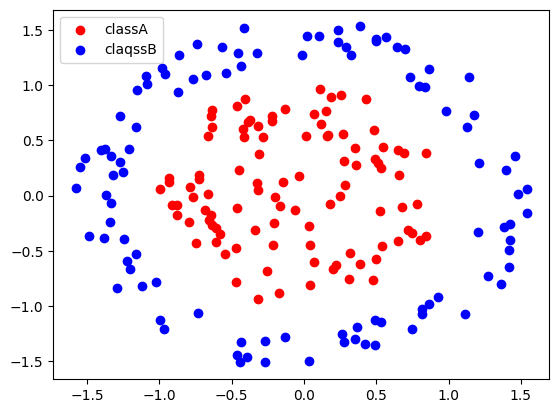

In [5]:
plt.scatter(classA_X1 , classA_X2 , color="red")
plt.scatter(classB_X1 , classB_X2 , color="blue")
plt.legend(["classA" , "claqssB"] , loc="upper left")

In [6]:
target = dataset.iloc[:, 2].values
X = dataset.iloc[:, [0, 1]].values

print("t : " ,target)
print("x : " , X)

t :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]
x :  [[-0.64282255  0.72060647]
 [-0.21812607  0.67726261]
 [-0.58292983 -0.34749617]
 [ 0.28512668  0.09174997]
 [-0.33557667 -0.31389274]
 [ 0.31739521 -0.52331519]
 [-0.63941109 -0.17120822]
 [ 0.11580448  0.64575158]
 [ 0.18989616  0.89158849]
 [ 0.06790498 -0.60116898]
 [-0.16874776 -0.09692314]
 [ 0.49544098 -0.57668554]
 [-0.54431436 -0.52899816]
 [ 0.26732691  0.55691933]
 [

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
   
   markers = ['s', 'x', 'o', '^', 'v']
   colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
   cmap = ListedColormap(colors[:len(np.unique(y))]) # type: ignore

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = np.array(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T))
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker= markers[idx], label=cl) 

In [ ]:
class Madaline:
    def __init__(self , n_adaline , epochs , learning_rate):
        self.n_adaline = n_adaline
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def predict(self,X):
        t_pred = []
        for p in range(X.shape[0]):
            z_in = np.dot(self.weights , X[p]) + self.bias
            z_out = self.activation(z_in)
            y_in = np.dot(z_out , self.v) + self.final_bias
            y_out = self.activation(y_in)
            t_pred.append(y_out)
                               

        return t_pred